In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


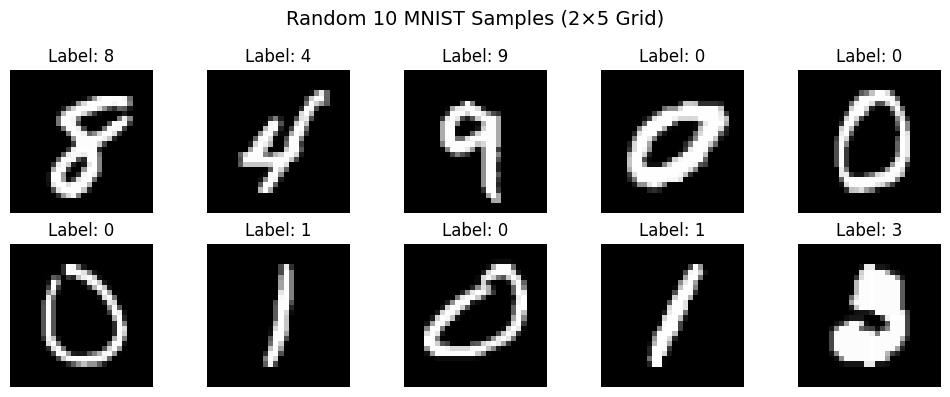

In [2]:

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



# Select 10 random samples
indices = np.random.choice(len(x_train), 10, replace=False)
sample_images = x_train[indices]
sample_labels = y_train[indices]

# Plot in 2x5 grid
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')

plt.suptitle("Random 10 MNIST Samples (2×5 Grid)", fontsize=14)
plt.tight_layout()
plt.show()

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7605 - loss: 0.3083
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.1405
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8098 - loss: 0.1222
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8113 - loss: 0.1138
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8120 - loss: 0.1091
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.1063
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.1038
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8128 - loss: 0.1018
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8135 - loss: 0.0999
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.0988
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.0977
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

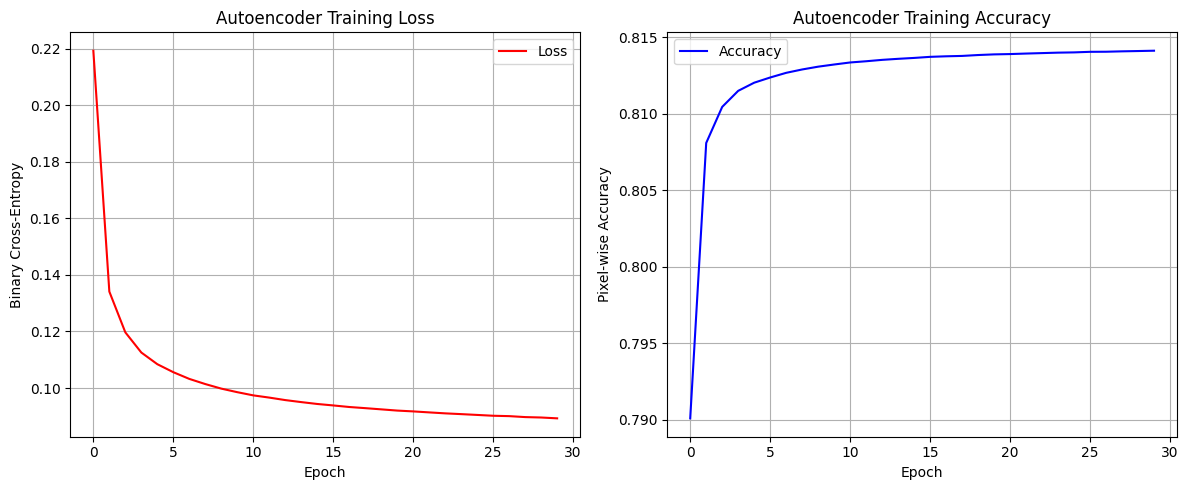

In [3]:

# Autoencoder Architecture
latent_dim = 64

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
decoder_input = Input(shape=(latent_dim,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

# Models
encoder = Model(input_img, encoded, name="Encoder")
decoder = Model(decoder_input, decoded, name="Decoder")

# Full Autoencoder
autoencoder_input = Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
reconstructed_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, reconstructed_img)

# Compile and Train Autoencoder
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True)


plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='red')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy')
plt.grid(True)
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.title('Autoencoder Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Pixel-wise Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8341 - loss: 0.5916 - val_accuracy: 0.9792 - val_loss: 0.0743
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9780 - loss: 0.0751 - val_accuracy: 0.9858 - val_loss: 0.0510
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9863 - val_loss: 0.0446
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0407 - val_accuracy: 0.9882 - val_loss: 0.0452
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9892 - loss: 0.0328 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9916 - loss: 0.0246 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9938 - loss: 0.0200 - val_accuracy: 0.9897 - val_loss: 0.0412
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9946 - loss: 0.0162 - val_accuracy: 0

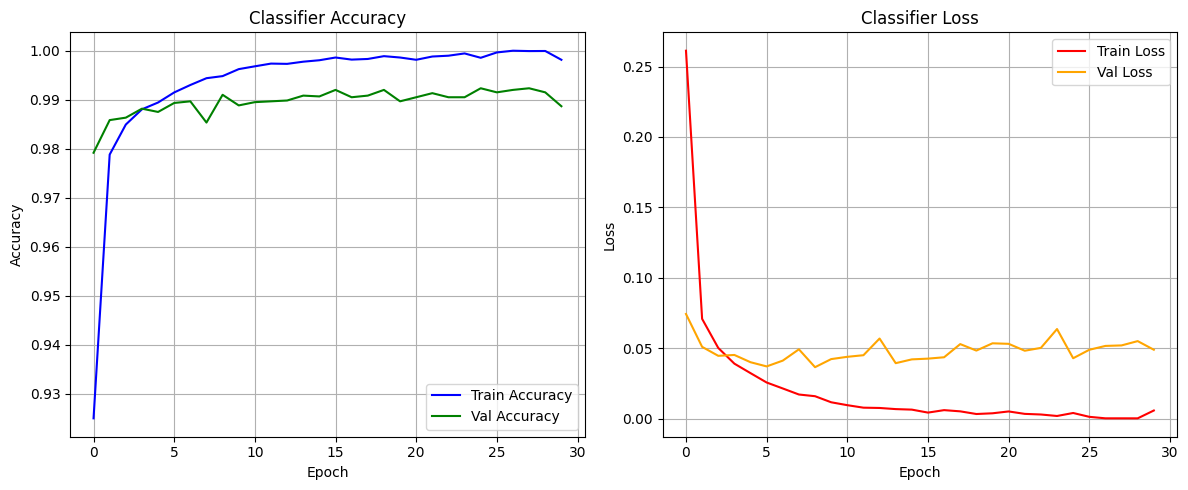

In [4]:
# Simple Classifier
input_cls = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_cls)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_cls = Dense(10, activation='softmax')(x)

classifier = Model(inputs=input_cls, outputs=output_cls)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Classifier on MNIST
history = classifier.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Classifier Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Classifier Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Sampled noise vectors (N(0, 1)): 

Noise Vector 1:
[ 0.34 -0.27 -0.58 -0.4   0.28 -1.71  0.88  0.34  1.3   1.63 -0.42  0.54
 -0.29 -1.69  0.21  1.07  0.23 -0.16  2.08 -0.17 -0.44 -0.44 -0.47 -0.79
 -0.92  0.53  1.8  -0.21  0.36 -0.6  -1.93  1.57 -0.83  0.11 -0.7  -1.53
  0.39  0.29 -0.72 -0.84 -0.32  0.47  0.48 -1.55  0.49 -1.41 -0.12  1.04
 -0.74  1.19 -0.35 -0.89 -1.25  0.65  0.14  0.19  2.5   0.26  0.48 -1.29
 -0.2  -0.61 -1.72 -0.88]

Noise Vector 2:
[ 0.29  0.97 -1.13 -0.45 -0.28  0.69 -0.    0.62 -0.12  0.45 -0.47  0.17
  0.09  0.53  0.54 -0.49  0.64  0.83  1.14 -0.44 -0.14  1.65  1.02  1.54
 -0.92  1.38  0.59  0.07 -0.94 -0.97 -1.62 -0.19  0.15 -0.12 -0.05  0.34
 -0.38  0.17  0.38  1.66 -0.53  0.35 -0.76 -0.08 -0.67  0.41 -0.39  0.93
  0.89 -0.93  2.64 -0.19 -0.66 -0.55  1.14  0.85 -0.13  0.65 -2.06 -1.58
  0.32 -0.37  0.62  0.27]

Noise Vector 3:
[ 1.05 -0.3  -0.02 -0.35 -2.26 -0.59  0.2  -2.3  -0.42 -1.4  -0.55  0.09
 -0.26 -0.19 -0.92 -0.41 -0.18  0.13  0.05  0.06  0.83  0.47

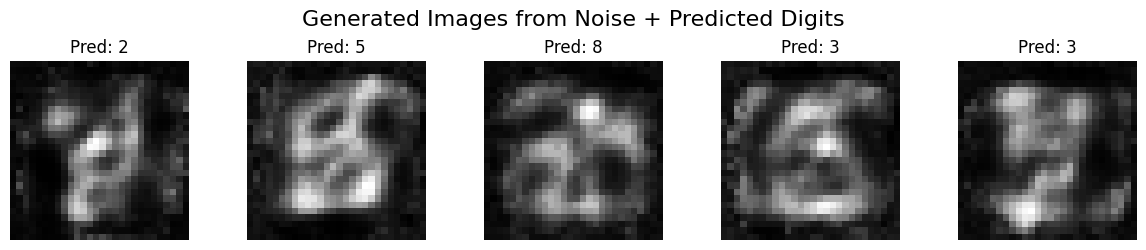

In [5]:

# Sample Noise Vectors
mean = 0
std_dev = 1
noise_vectors = np.random.normal(loc=mean, scale=std_dev, size=(5, latent_dim))

# Show the sampled noise vectors
print("Sampled noise vectors (N({}, {})): \n".format(mean, std_dev))
for i, vec in enumerate(noise_vectors):
    print(f"Noise Vector {i+1}:")
    print(np.round(vec, 2))
    print()

# Generate Images from Decoder
generated_images = decoder.predict(noise_vectors)

# Predict Labels Using Classifier
predicted_labels = classifier.predict(generated_images)
predicted_digits = np.argmax(predicted_labels, axis=1)

# Display the Generated Images with Predicted Labels
plt.figure(figsize=(12, 2.5))
for i, img in enumerate(generated_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}")
    plt.axis('off')
plt.suptitle("Generated Images from Noise + Predicted Digits", fontsize=16)
plt.tight_layout()
plt.show()
